In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('C:/Walmart_Forecast/datas/train.csv')
stores = pd.read_csv('C:/Walmart_Forecast/datas/stores.csv')
features = pd.read_csv('C:/Walmart_Forecast/datas/features.csv')

# # Display basic information about the datasets
# print(train.info())
# print(stores.info())
# print(features.info())


# Show the first few rows of each dataset
print(train.head())
print(stores.head())
print(features.head())


   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         

## Data Preprocessing and Merging


In [2]:
# Merge train with stores

train_merged = pd.merge(train, stores, on = 'Store', how='left')
# on='stores': This specifies that the merge should be done based on the column named 'stores' that exists in both DataFrames.
# how='left': This specifies the type of merge to perform. A left join (or left merge) keeps all the rows from the train DataFrame and adds matching rows from the stores DataFrame. If there is no match, the result will have NaN for columns from the stores DataFrame. Just like sql left join I guess.

# Merge with features
train_full_merged = pd.merge(train_merged, features, on=['Store', 'Date'], how='left')
# Convert Date to datetime
# This allows you to perform various date-related operations, such as filtering by date range, extracting specific components (like year, month, day), and more.
train_full_merged['Date'] = pd.to_datetime(train_full_merged['Date'])
# Sort by Date
train_full_merged = train_full_merged.sort_values('Date')
train_full_merged









,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
277665,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,False
277808,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,False
277951,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,False
278094,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379648,40,87,2012-10-26,24638.96,False,A,155083,49.65,3.917,3605.71,55.98,0.28,486.81,1389.06,138.728161,4.145,False
181170,19,30,2012-10-26,3740.12,False,A,203819,56.49,4.071,5430.75,90.07,NaN,904.34,1665.77,138.728161,7.992,False
181313,19,31,2012-10-26,3128.17,False,A,203819,56.49,4.071,5430.75,90.07,NaN,904.34,1665.77,138.728161,7.992,False
181599,19,33,2012-10-26,5740.14,False,A,203819,56.49,4.071,5430.75,90.07,NaN,904.34,1665.77,138.728161,7.992,False


## EDA (Exploratory Data Analysis)


Importance of EDA in Forecasting Predictions
EDA is a critical step in any forecasting prediction process because it helps you understand the data's structure, trends, and potential pitfalls. Here's why it's essential:

1. Understanding Patterns and Trends
Forecasting relies on detecting patterns in past data to predict the future.
EDA helps you uncover:
Seasonality: Periodic fluctuations in sales (e.g., higher sales during holidays).
Trends: Long-term growth or decline.
Anomalies: Sudden unexpected changes that could distort predictions if not accounted for.
2. Identifying Relationships
Variables like Store Type or Promotions might influence sales.
EDA helps identify which features are significant for prediction and informs feature engineering for your forecasting model.
3. Spotting Data Issues
Missing Data: Identify gaps in the dataset that need handling.
Outliers: Detect extreme values that could skew model training.
Errors: Spot inconsistencies, such as duplicate entries or incorrect values.
4. Building Intuition
EDA gives you a sense of the story your data is telling.
For example:
Do certain store types consistently outperform others?
Are there clear seasonal peaks you need to account for in your model?
5. Improving Model Accuracy
EDA informs decisions about:
Feature Selection: Choosing which variables to include in your model.
Data Transformation: Adjusting the data to make patterns clearer.
Validation: Ensuring the model aligns with real-world trends.
## Real-Life Analogy
Imagine you're preparing to bake a cake:
EDA is like inspecting your ingredients beforehand—checking their quality, understanding how they interact, and identifying any missing or spoiled items.
Without this step, your cake (forecasting model) might fail because the ingredients (data) weren't properly understood or prepared.
In short, EDA ensures your forecasting predictions are built on a solid foundation of well-understood and clean data!











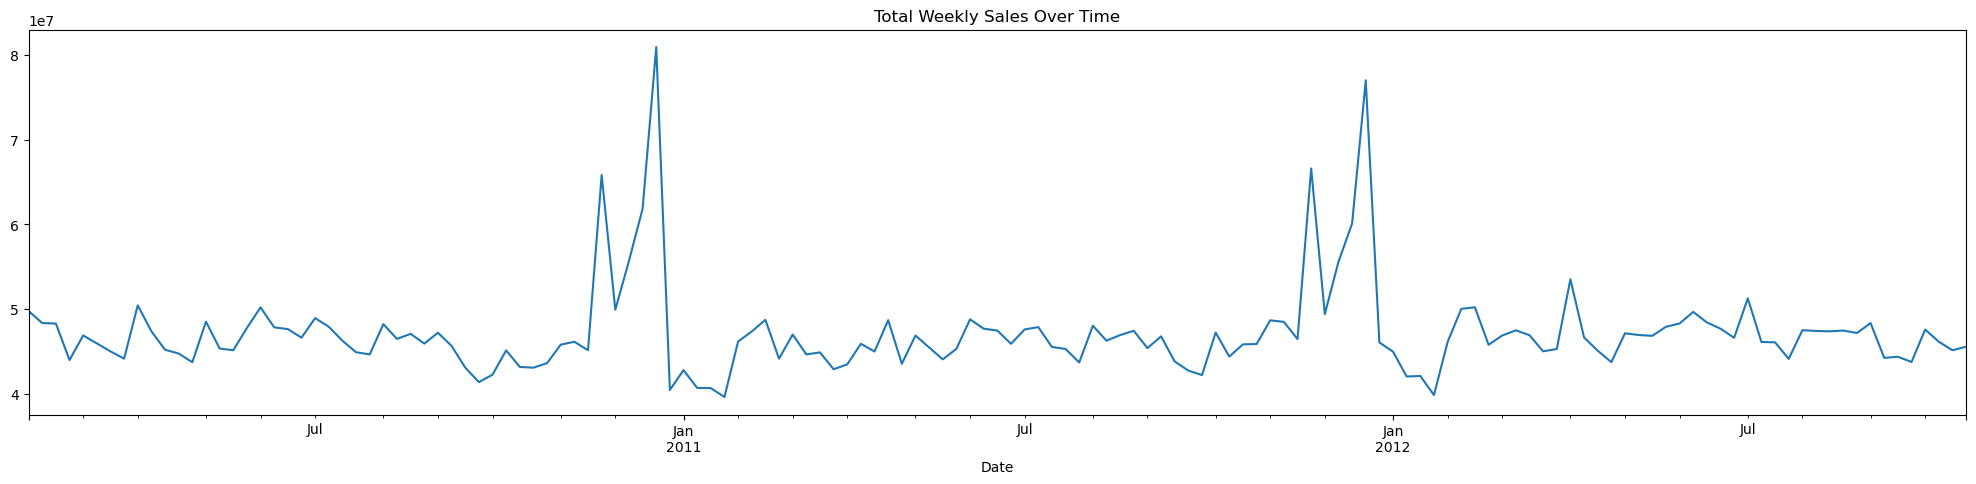

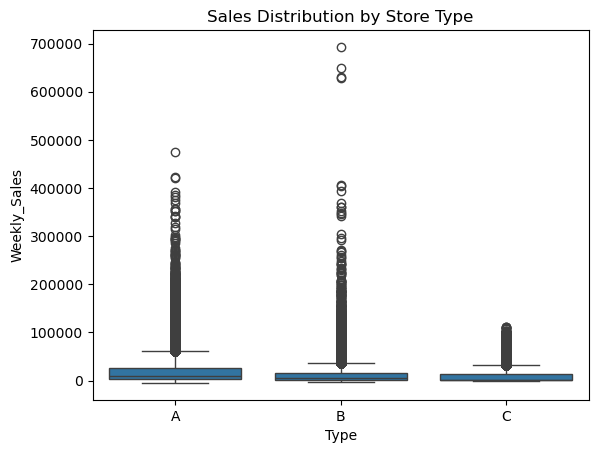

In [3]:
# Plot total sales over time?
plt.figure(figsize=(25,5))
train_full_merged.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Total Weekly Sales Over Time')
plt.show()

# Analyze sales by store type
sns.boxplot(x='Type', y='Weekly_Sales', data = train_full_merged)
plt.title('Sales Distribution by Store Type')
plt.show()


## IN line graph 
Key Observations
Seasonal Peaks:

There are noticeable spikes around late November to December in both years (2010 and 2011).
These spikes likely correspond to the holiday shopping season (e.g., Thanksgiving, Black Friday, Christmas).
Post-Holiday Drop:

After the holiday season, sales drop sharply, which is typical as consumer spending decreases after holidays.
General Trend:

Apart from the spikes, sales appear relatively stable but slightly fluctuate weekly.
Possible Anomalies:

Large fluctuations in sales outside of the holiday seasons could indicate promotions, store openings/closures, or data anomalies.
How This Helps in Forecasting
Identifies Seasonality:

The clear holiday spikes suggest seasonal patterns that must be incorporated into the forecasting model.
Highlights Stability:

The relatively consistent sales outside the holiday periods provide a solid baseline for predicting regular weekly sales.
Informs Model Adjustments:

The sharp increases and decreases around holidays emphasize the need for a model that accounts for external factors like holidays or events.


Line graph : The y-axis in the graph represents the total weekly sales, but the specific unit of measurement is not indicated in the image. The numerical values on the y-axis range from 0 to 7, with increments of 1. To determine the exact amount of sales, you would need to know what each increment on the y-axis represents (e.g., thousands of units sold, revenue in dollars).



First let's know about IQR:- The Interquartile Range (IQR) is a measure of statistical dispersion, which indicates how spread out the data points are. It represents the range within which the middle 50% of the data lies. The IQR is calculated as the difference between the third quartile (Q3) and the first quartile (Q1):
IQR=Q3−Q1 
In other words, it is the range between the 75th percentile and the 25th percentile of the data. The IQR is useful for identifying outliers and understanding the variability of the data while minimizing the influence of extreme values.

BoxPlot:- 
Store Type A:
Median Sales: Around 200,000.
IQR: The box shows the spread of sales data around the median.
Outliers: There are several outliers extending close to 700,000, indicating some weeks had exceptionally high sales.
Store Type B:
Median Sales: Slightly higher than Store Type A.
IQR: The spread of sales is similar to Store Type A but with fewer outliers.
Store Type C:
Median Sales: Much lower compared to Store Types A and B.
IQR: The data points are more concentrated, indicating less variability in sales.

## In boxplot
What This Tells Us
Store Performance Differences:

Type A stores generally perform better in terms of weekly sales, likely due to size, location, or customer base.
Type B stores have moderate performance.
Type C stores are smaller or serve fewer customers.
Variability and Outliers:

The high number of outliers in Types A and B indicates that some stores in these categories perform exceptionally well (or are influenced by events like promotions).
How This Affects Forecasting
Segmentation: Each store type behaves differently, so forecasting models should consider store type as a feature.
Outliers: Models must handle extreme values to avoid skewed predictions.
Prioritization: If optimizing for high sales, Type A stores should be the focus.


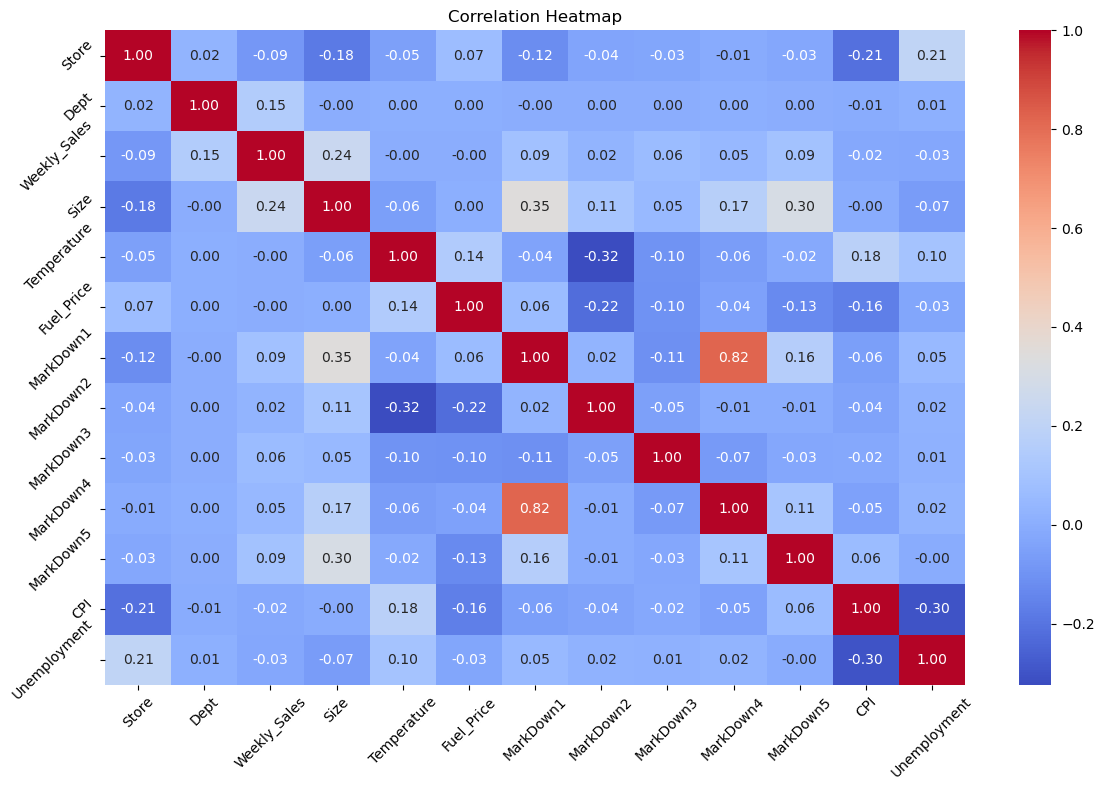

In [4]:
#Correlation heatmap

# Select Numeric Columns
numeric_columns = train_full_merged.select_dtypes(include=['int64', 'float64']).columns
correlation = train_full_merged[numeric_columns].corr()

# Create a heatmap (adjust the figure size based on number of features)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


# Key Points to Note
#### 1. Diagonal Elements:
All diagonal elements are 1.00, indicating that each variable is perfectly correlated with itself. This is a standard feature of correlation matrices.

#### 2. Strong Positive Correlations:
MarkDown1 and MarkDown4: They have a correlation of 0.82, indicating a strong positive relationship.
MarkDown2 and MarkDown3: They have a correlation of 1.00, which is a perfect positive correlation.

#### 3. Strong Negative Correlations:
CPI and Unemployment: They have a correlation of -0.30, indicating a weak negative relationship.

#### 4. Weekly_Sales:
Weekly_Sales and Size: They have a moderate positive correlation of 0.24.
Weekly_Sales and Fuel_Price: They have a weak positive correlation of 0.14.

#### 5. Size:
Size and MarkDown1: They have a moderate positive correlation of 0.35.

#### Example Interpretations
MarkDown1 and MarkDown4 (0.82): If MarkDown1 increases, MarkDown4 is likely to increase as well.

Weekly_Sales and Size (0.24): A larger store size is somewhat associated with higher weekly sales, though the relationship is not very strong.

### CPI and Unemployment (-0.30): 
As the Consumer Price Index (CPI) increases, unemployment tends to decrease slightly, but this is a weak negative relationship.

Verifying Correct Output
Correctness: The heatmap looks correctly generated with proper color gradients and annotations. The diagonal elements are all 1.00, and the correlation coefficients appear to be correctly calculated.

Consistency: Check if the relationships identified (like between MarkDown1 and MarkDown4) make logical sense based on your understanding of the dataset.






### 5. Feature Engineering

In [5]:
# Extract year, month, day from Date
train_full_merged['Year'] = train_full_merged['Date'].dt.year
train_full_merged['Month'] = train_full_merged['Date'].dt.month
train_full_merged['Day'] = train_full_merged['Date'].dt.day

# Create lag features
train_full_merged['Sales_Lag1'] = train_full_merged.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)
train_full_merged['Sales_Lag2'] = train_full_merged.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(2)

# Handle missing values created by lag features
train_full_merged = train_full_merged.dropna()

print (train_full_merged.head())

        Store  Dept       Date  Weekly_Sales  IsHoliday_x Type    Size  \
73260       8    33 2011-11-11       4244.08        False    A  155078   
64244       7    41 2011-11-11        480.16        False    B   70713   
294797     31     8 2011-11-11      27456.25        False    A  203750   
390394     41    94 2011-11-11      39188.80        False    A  196321   
17120       2    56 2011-11-11       1122.35        False    A  202307   

        Temperature  Fuel_Price  MarkDown1  ...  MarkDown4  MarkDown5  \
73260         50.56       3.297    4971.01  ...    1407.72    3846.73   
64244         19.53       3.505    3307.60  ...    1330.31    1680.90   
294797        59.80       3.297   25879.08  ...    3983.24    7898.07   
390394        32.87       3.505   17118.58  ...    8187.22    4925.08   
17120         59.33       3.297   10797.64  ...    4754.07    4787.16   

               CPI  Unemployment  IsHoliday_y  Year  Month  Day  Sales_Lag1  \
73260   221.459513         6.123     

##### Shifting and lagging
Shifting
Definition: Shifting generally refers to moving data points forward or backward along the time axis. It means changing the position of data points in a series.
Usage: Shifting is a broader term that can apply to both forward and backward movements. For instance, you might shift data points to predict future values or to compare past values.

##### Problem: Predicting Future Sales
To predict future sales, you want to create new features that capture past sales performance, which can help in building a more accurate forecasting model.

##### Create Lag Features (Shifting):

By creating lag features, you capture the sales from previous weeks, which can be strong predictors of future sales.

### 6.Model Preparation


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features for modeling
# Features: Specifies the columns to be used as features in the model.
features = ['Store', 'Dept', 'IsHoliday_x', 'IsHoliday_y', 'Type', 'Size', 'Temperature', 
            'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 
            'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 
            'Sales_Lag1', 'Sales_Lag2']

X = train_full_merged[features]
# Target Variable: The column Weekly_Sales is set as the target variable (y).
y = train_full_merged['Weekly_Sales']
# X, y: Creates the feature matrix X and the target variable y from the DataFrame train_full_merged.

# One-hot encode the 'Type' column
X = pd.get_dummies(X, columns=['Type'])

# Split the data
# Train-Test Split: Splits the data into training and testing sets.
# test_size=0.2: 20% of the data is allocated for testing, and 80% for training.
# random_state=42: Ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

Root Mean Squared Error: 5956.117022306693
R-squared Score: 0.9400590062312494


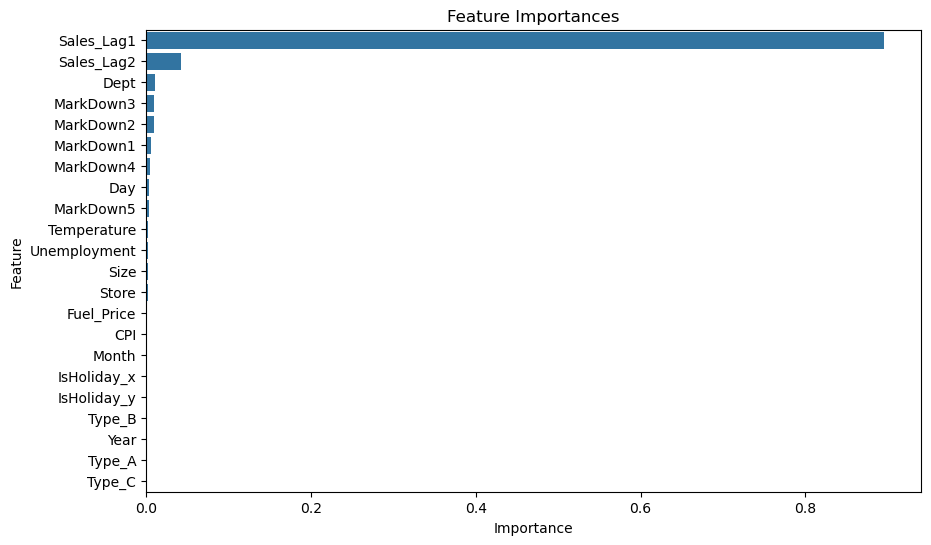

In [10]:
# Get feature importances
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming rf_model is already trained
importances = rf_model.feature_importances_
features = X_train.columns  # Replace with the source of your feature names

if len(features) != len(importances):
    raise ValueError("Mismatch in lengths of features and importances!")

feature_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_imp = feature_imp.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title('Feature Importances')
plt.show()


In [19]:
# Load and preprocess test data
test = pd.read_csv('C:/Walmart_Forecast/datas/test.csv')
stores = pd.read_csv('C:/Walmart_Forecast/datas/stores.csv')
features = pd.read_csv('C:/Walmart_Forecast/datas/features.csv')

# Merge test data with additional datasets
test = pd.merge(test, stores, on='Store', how='left')
test = pd.merge(test, features, on=['Store', 'Date'], how='left')

# Ensure no missing values after merging
test = test.dropna()  # Drop rows with missing values

# Generate 'Id' column if missing
if 'Id' not in test.columns:
    test['Id'] = test.index  # Generate unique IDs if necessary

# Apply preprocessing steps to match model's expectations
# (Assume preprocessing results in X_test_scaled)
# X_test_scaled should match the rows in 'test'

# Make predictions
test_predictions = rf_model.predict(X_test_scaled)

# Ensure lengths of predictions and test IDs match
if len(test_predictions) != len(test):
    test = test.iloc[:len(test_predictions)]  # Align test rows with predictions

# Prepare submission file
submission = pd.DataFrame({
    'Id': test['Id'],
    'Weekly_Sales': test_predictions
})
submission.to_csv('submission.csv', index=False)
